CAR PRICE PREDICTION

To predict the price of a car using ML Algorithms

Attribute:
Car_name  - Name of the car
Year      - Manufacturing Year
Selling_Price - Final selling price
Present_Price - Showroom Price
Driven_kms    -Total kms driven
Fuel_Type     - Type of the fuel (Petrol/Diesel/Electric)
Selling_Type  - Type of sale (Dealer/Individual)
Transmission  - Transmission Type (Manual/ Automatic)
Owner         - Number of previous owners

Import Libraries

In [30]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis

In [31]:
df=pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
df.shape

(301, 9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
print(df["Fuel_Type"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [35]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [36]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [38]:
print(df["Fuel_Type"].value_counts())

Fuel_Type
2    239
1     60
0      2
Name: count, dtype: int64


2: Petrol 1:Diesel 0:CNG

DATA VISUALISATION

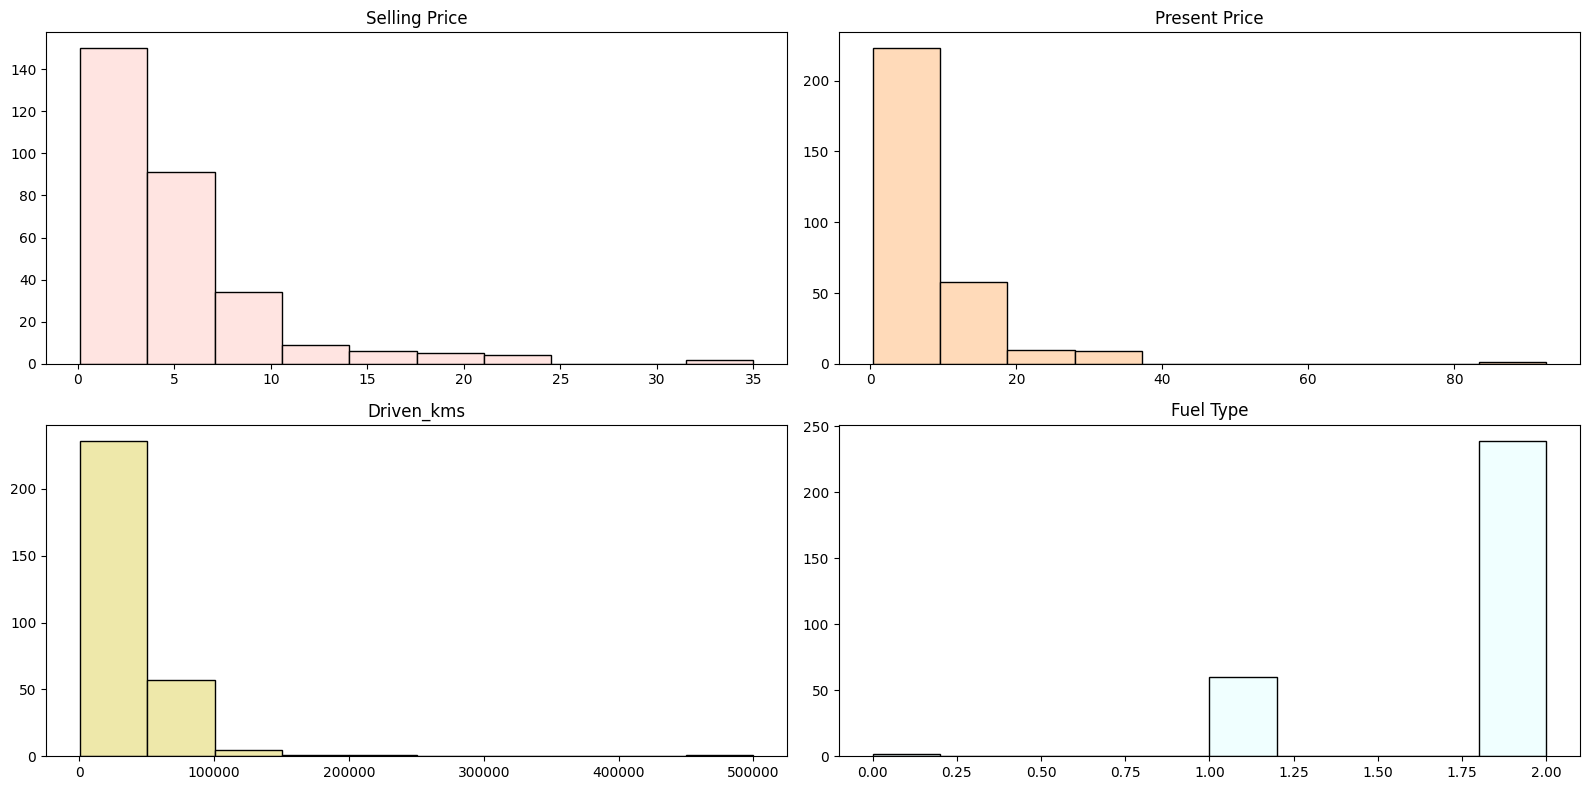

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].hist(df['Selling_Price'],color='mistyrose',edgecolor='black')
axes[0, 0].set_title('Selling Price')
axes[0,1].hist(df['Present_Price'],color='peachpuff',edgecolor='black')
axes[0, 1].set_title('Present Price')
axes[1,0].hist(df['Driven_kms'],color='palegoldenrod',edgecolor='black')
axes[1, 0].set_title('Driven_kms')
axes[1,1].hist(df['Fuel_Type'],color='azure',edgecolor='black')
axes[1,1].set_title('Fuel Type')
plt.tight_layout()
plt.show()

In [40]:
df.drop('Car_Name', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Selling_type   301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


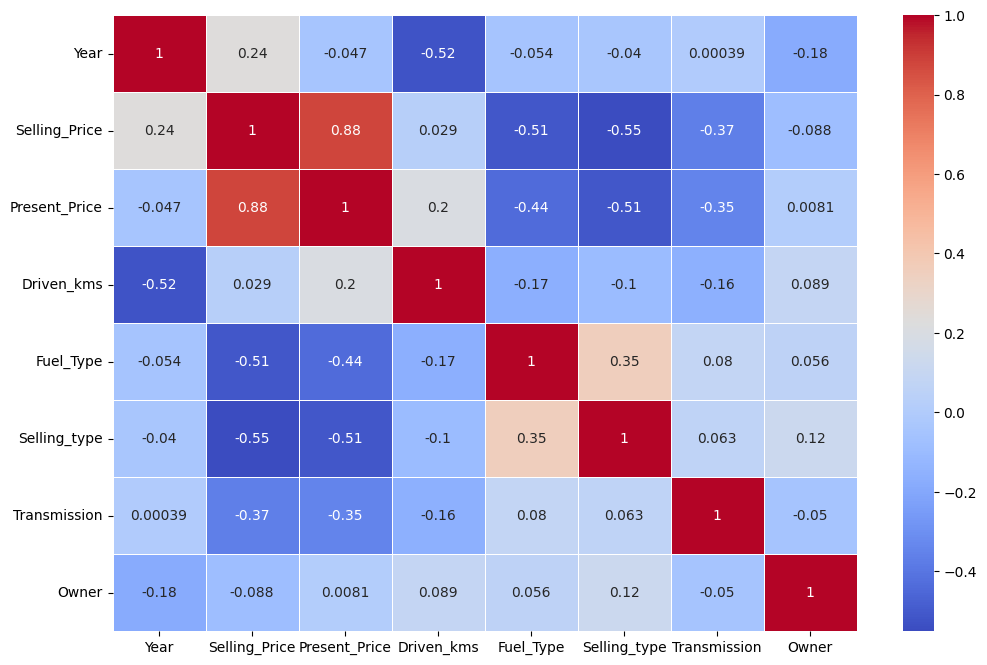

In [41]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

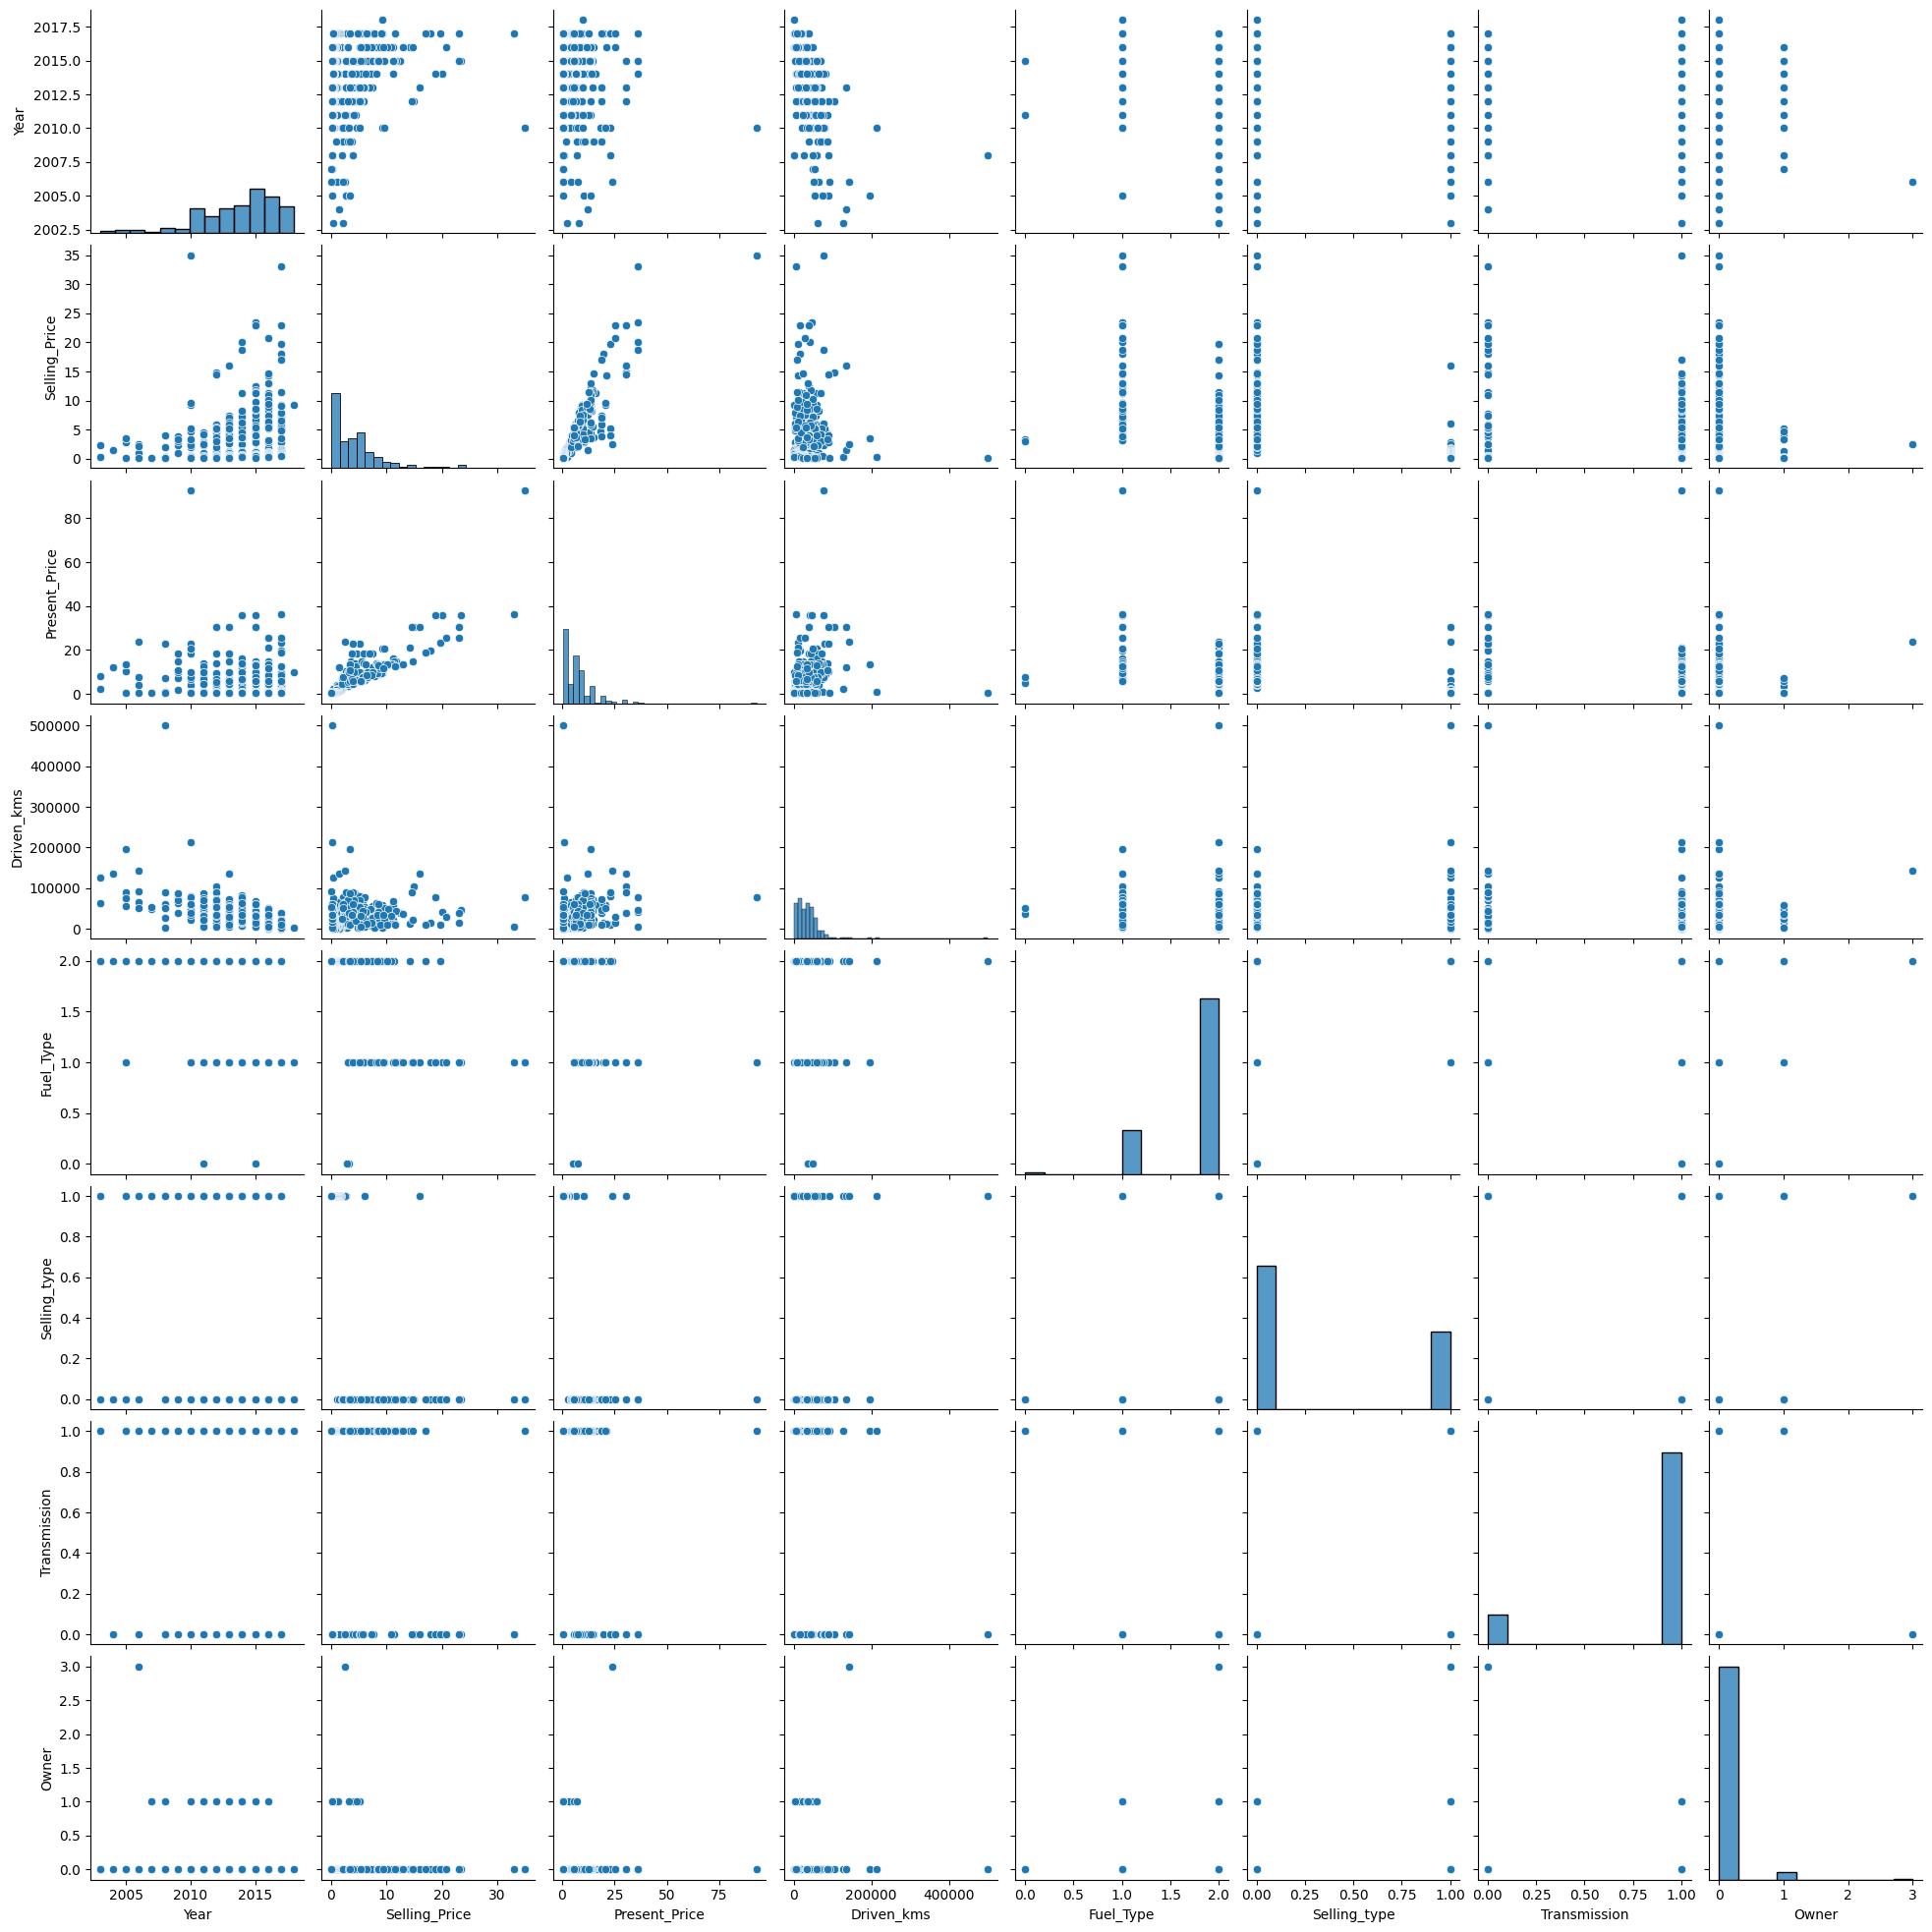

In [42]:
sns.pairplot(df)

In [43]:
import plotly.express as px
fig = px.box(df, x='Year', y='Selling_Price', color='Year', title='Selling price over year', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
plt.figure(figsize=(6, 4))
fig.show()

<Figure size 600x400 with 0 Axes>

In [44]:
import plotly.express as px
fig = px.box(df, x='Year', y='Present_Price', color='Year', title='Present price over year', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
plt.figure(figsize=(6, 4))
fig.show()

<Figure size 600x400 with 0 Axes>

In [45]:
import plotly.express as px
fig = px.box(df, x='Year', y='Driven_kms', color='Year', title='kms driven over year', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
plt.figure(figsize=(6, 4))
fig.show()

<Figure size 600x400 with 0 Axes>

In [48]:
import plotly.express as px
fig = px.box(df, x='Year', y='Fuel_Type', color='Fuel_Type', title='Type of fuel over year', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
plt.figure(figsize=(6, 4))
fig.show()

<Figure size 600x400 with 0 Axes>

In [51]:
import plotly.express as px
fig = px.box(df, x='Year', y='Driven_kms', color='Year', title='kms driven over year', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
plt.figure(figsize=(6, 4))
fig.show()

<Figure size 600x400 with 0 Axes>

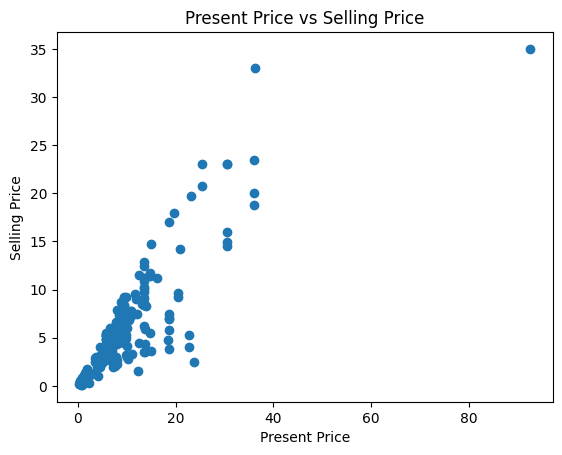

In [54]:
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

ML MODEL

In [56]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 3.5315798889713164
R-squared: 0.8466902419662664


In [60]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge Regression R²: 0.8473316514557678
Ridge Regression RMSE: 3.5168046464637897


In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", mean_squared_error(y_test, y_pred_lasso))

Lasso Regression R²: 0.8446762267416481
Lasso Regression RMSE: 3.577973906903164


In [62]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_dt))

Decision Tree R²: 0.9106964649225722
Decision Tree RMSE: 2.057159130236794


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R²: 0.9663399744387853
Random Forest RMSE: 0.7753783637704919


In [64]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=100, random_state=0, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb))

XGBoost R²: 0.9578684486649824
XGBoost RMSE: 0.970524911748745


In [ ]:
Summary:

Models                         r2                 RMSE
Linear Regression             0.8466             3.5315
Ridge Regressor               0.8473             3.5168
Lasso Regressor               0.8446             3.5779
DecisionTreeRegressor         0.9106             2.0571
Random Forest Regressor       0.9663             0.7753
XGBoost Regressor             0.9578             0.9705

Inference:
Based on the above models, Random Forest Regressor is best. Highly accurate and stable. Next to Random Forest, XGBoost Regressor is best